<a href="https://colab.research.google.com/github/corinnakeum1/DS-4002/blob/main/EDAlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
! git clone https://github.com/DS3001/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 34 (delta 4), reused 1 (delta 1), pack-reused 22 (from 1)
Receiving objects: 100% (34/34), 7.18 MiB | 11.89 MiB/s, done.
Resolving deltas: 100% (7/7), done.


The "relevant" variables for this question are:

level - Level of institution (4-year, 2-year)

aid_value - The average amount of student aid going to undergraduate recipients

control - Public, Private not-for-profit, Private for-profit

grad_100_value - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)


In [7]:
import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd  # Import the pandas package into your workspace
import seaborn as sns # Import Seaborn

df = pd.read_csv('visualization/assignment/data/college_completion.csv',low_memory=False)

print( df.shape, '\n')

print(df.dtypes, '\n')
print(df.columns, '\n') # Column names
df.head()
#print(df.head())


(3798, 63) 

index                int64
unitid               int64
chronname           object
city                object
state               object
                    ...   
state_sector_ct      int64
carnegie_ct          int64
counted_pct         object
nicknames           object
cohort_size        float64
Length: 63, dtype: object 

Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentil

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


What are are the dimensions of the data?
There are 5 rows and 63 columns in the data frame.  

How many observations (row) are there?
3798

What are the variables (columns) included?
'index', 'unitid', 'chronname', 'city', 'state', 'level', 'control' 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count','awards_per_value', 'awards_per_state_value', 'awards_per_natl_value','exp_award_value', 'exp_award_state_value', 'exp_award_natl_value','exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile','med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile','endow_value', 'endow_percentile', 'grad_100_value' 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile' 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile' 'ft_fac_value', 'ft_fac_percentile', 'vsa_year' 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first' 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first' 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first' 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first' 'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer' 'vsa_enroll_after4_transfer', 'vsa_enroll_elsewhere_after4_transfer' 'vsa_grad_after6_transfer', 'vsa_grad_elsewhere_after6_transfer' 'vsa_enroll_after6_transfer', 'vsa_enroll_elsewhere_after6_transfer' 'similar', 'state_sector_ct', 'carnegie_ct', 'counted_pct', 'nicknames','cohort_size'

Cross tabulate control and level. Describe the patterns you see.

The private not-for-profit 4 year institutions are the highest number institutions. Largest 2nd year institutions are public.

In [8]:
# cross tabulate control and level
pd.crosstab(df['control'], df['level'])


level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


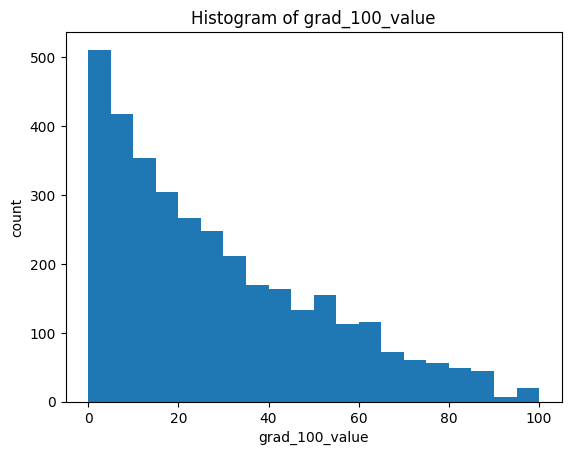

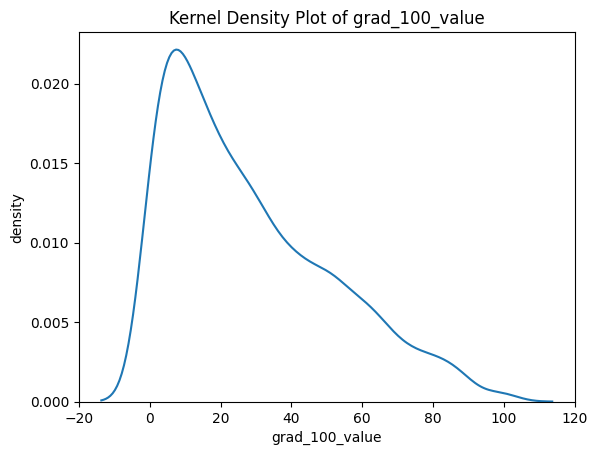

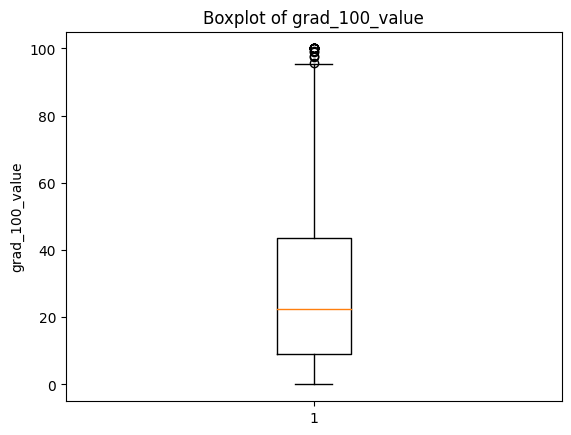

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [9]:
# For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.

# Histogram
plt.hist(df['grad_100_value'], bins=20)
plt.xlabel('grad_100_value')
plt.ylabel('count')
plt.title('Histogram of grad_100_value')
plt.show()

# Kernel density plot
sns.kdeplot(df['grad_100_value'])
plt.xlabel('grad_100_value')
plt.ylabel('density')
plt.title('Kernel Density Plot of grad_100_value')
plt.show()

# Boxplot
plt.boxplot(df['grad_100_value'].dropna())
plt.ylabel('grad_100_value')
plt.title('Boxplot of grad_100_value')
plt.show()

# Statistical description
print(df['grad_100_value'].describe())


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


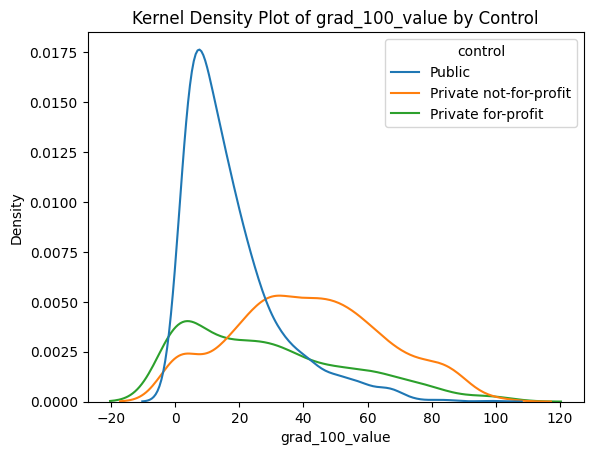

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


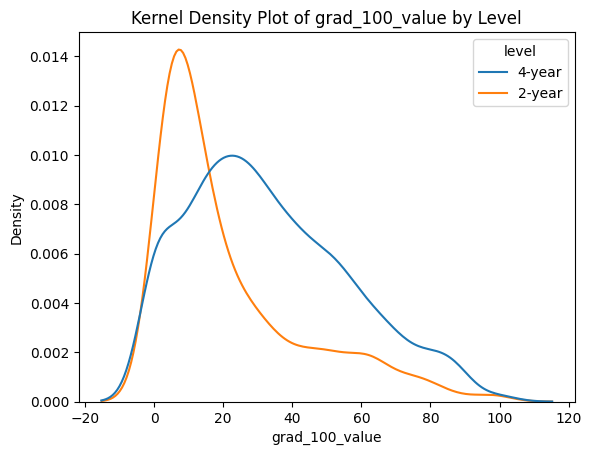

In [10]:
# For grad_100_value, create a grouped kernel density plot by control and by level.

# Grouped kernel density plot by control
sns.kdeplot(data=df, x='grad_100_value', hue='control')
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.title('Kernel Density Plot of grad_100_value by Control')
plt.show()

# Grouped kernel density plot by level
sns.kdeplot(data=df, x='grad_100_value', hue='level')
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.title('Kernel Density Plot of grad_100_value by Level')
plt.show()


Describe what you see. Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control. Which institutions appear to have the best graduation rates?
4 year and public institutions have the highest number of graduation rates.  

In [11]:
# Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control.

# Grouped statistical description of grad_100_value by level
print(df.groupby('level')['grad_100_value'].describe())

# Grouped statistical description of grad_100_value by control
print(df.groupby('control')['grad_100_value'].describe())


         count       mean        std  min   25%   50%     75%    max
level                                                               
2-year  1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year  2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0
                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


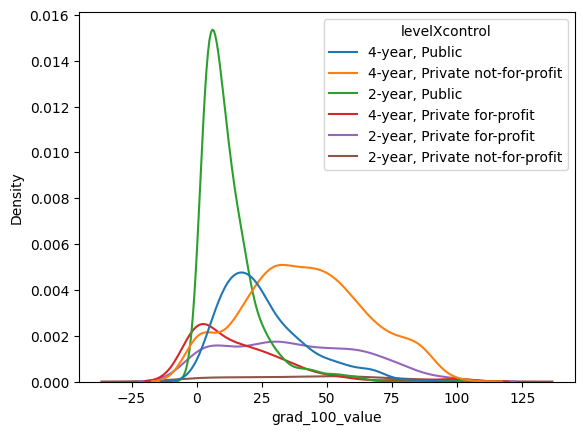

In [12]:
# Grouped kernel density plot by control and level
df['levelXcontrol']=df['level']+', '+df['control']
sns.kdeplot(data=df,x='grad_100_value',hue='levelXcontrol')
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.show()


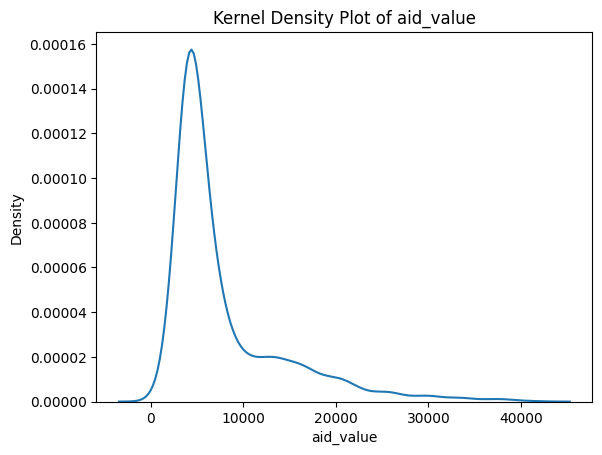

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='aid_value', ylabel='Density'>

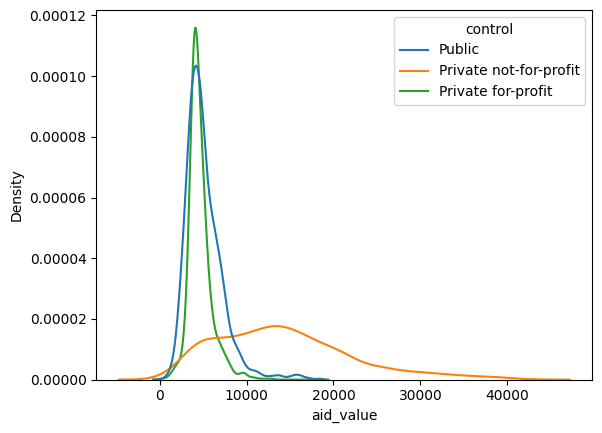

In [13]:
# prompt: Make a kernel density plot of aid_value

sns.kdeplot(df['aid_value'])
plt.xlabel('aid_value')
plt.ylabel('Density')
plt.title('Kernel Density Plot of aid_value')
plt.show()

# Now group your graph by level and control.
sns.kdeplot(data=df,x='aid_value',hue='control')

In [14]:
# Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.

# Grouped statistical description of aid_value by level and control
print(df.groupby('level')['aid_value'].describe())
print(df.groupby('control')['aid_value'].describe())


         count          mean          std    min     25%     50%      75%  \
level                                                                       
2-year  1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year  2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

            max  
level            
2-year  13654.0  
4-year  41580.0  
                         count          mean          std    min      25%  \
control                                                                     
Private for-profit       991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit  1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                  1558.0   5094.835687  2136.436370  881.0  3725.25   

                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   

What explains the shape of the graph?
the peak in the kernel density plot for aid_value is associated with the spike in aid value with the 2 year and private for profit and public institutions.

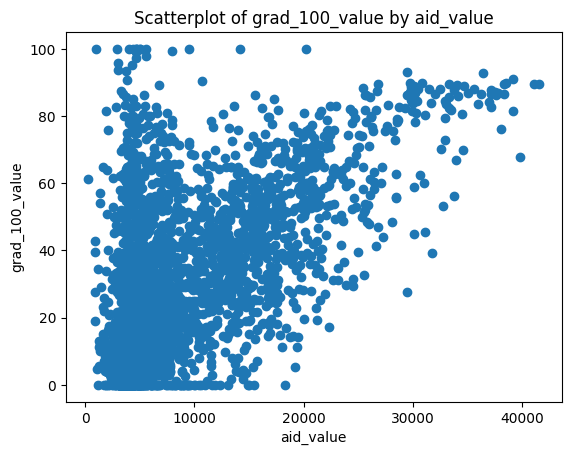

In [15]:
# Make a scatterplot of grad_100_value by aid_value

plt.scatter(df['aid_value'], df['grad_100_value'])
plt.xlabel('aid_value')
plt.ylabel('grad_100_value')
plt.title('Scatterplot of grad_100_value by aid_value')
plt.show()


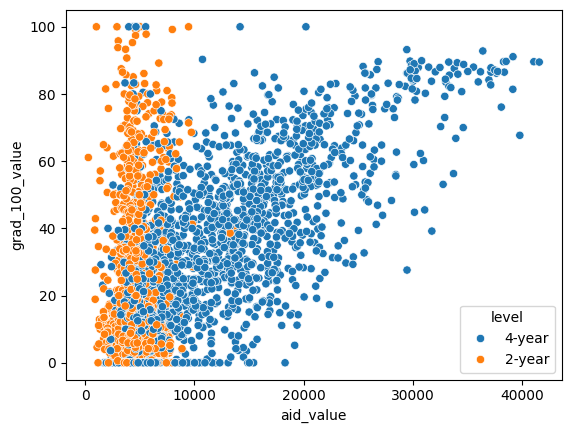

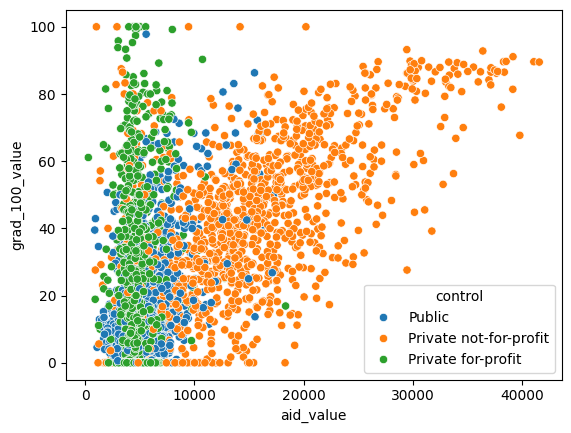

In [16]:
sns.scatterplot(x='aid_value', y='grad_100_value', hue='level', data=df)
plt.show()

sns.scatterplot(x='aid_value', y='grad_100_value', hue='control', data=df)
plt.show()

Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?
As an increase of aid_value there is an increase with grad_100_value. Mostly for private not-for-profit  and 4 year have an increase in aid_value and grad_100_value. whereas, private for-profit, public, and 2 year institutions stay around the 9000 aid_value.

In [18]:
import urllib.request
import json

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://data.cms.gov/data-api/v1/dataset/be64fce3-e835-4589-b46b-024198e524a6/data'
# Medicaid spending by drug

response = urllib.request.urlopen(url)
response_bytes = response.read()
data = json.loads(response_bytes)
response.close()

df = pd.DataFrame.from_dict(data) # converts to dataframe

print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables; `object` is a bad sign
print(df.columns, '\n') # Column names
df.head()
print(df.head())


(1000, 36) 

Brnd_Name                          object
Gnrc_Name                          object
Tot_Mftr                           object
Mftr_Name                          object
Tot_Spndng_2018                    object
Tot_Dsg_Unts_2018                  object
Tot_Clms_2018                      object
Avg_Spnd_Per_Dsg_Unt_Wghtd_2018    object
Avg_Spnd_Per_Clm_2018              object
Outlier_Flag_2018                  object
Tot_Spndng_2019                    object
Tot_Dsg_Unts_2019                  object
Tot_Clms_2019                      object
Avg_Spnd_Per_Dsg_Unt_Wghtd_2019    object
Avg_Spnd_Per_Clm_2019              object
Outlier_Flag_2019                  object
Tot_Spndng_2020                    object
Tot_Dsg_Unts_2020                  object
Tot_Clms_2020                      object
Avg_Spnd_Per_Dsg_Unt_Wghtd_2020    object
Avg_Spnd_Per_Clm_2020              object
Outlier_Flag_2020                  object
Tot_Spndng_2021                    object
Tot_Dsg_Unts_2021    

The column types are indicated as a object and, meaning there are missing data. For the categorical variables it does not describe the possible values and missing value codes. to handel the missing values, we must convert these columns to numeric types by using the function pd.to_numeric(). I find the data really interesting, but a more structured data dictionary would be able to make a more clear dataset. For instance, providing clear definitions of the columns and making the turning the columns needed to be numeric, numeric.

Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.

i am picking to use Tot_Dsg_Unts_2022 and Tot_spndng_2022. Tot_Dsg_Unts_2022 is the 2022 total dosage units, where the it represents the total number of units of the medication dispensed in 2022, measured in the smallest dispensable form. Tot_spndng_2022 is the 2022 total spending, this shows the total amount of money spent on the drug by medicaid. this is interesting in joining together because the looking at the total spending and total dosage units shows whether certain drugs are expensive per unit or simply consumed by high volues.

In [22]:
clean_variables = ['Tot_Dsg_Unts_2022', 'Tot_Spndng_2022']

# convert the columns to numeric
df[clean_variables] = df[clean_variables].apply(pd.to_numeric, errors='coerce')

# replace NaN with 0
df[clean_variables] = df[clean_variables].fillna(0)

# basic statistical summary to check for potential issues
summary_stats = df[clean_variables].describe()
print(summary_stats)

# calculate Spending per Dosage Unit
df['Spending_Per_Dosage_2022'] = df['Tot_Spndng_2022'] / df['Tot_Dsg_Unts_2022']

# infinite or NaN values where dosage units are 0
df['Spending_Per_Dosage_2022'].replace([float('inf'), -float('inf')], 0, inplace=True)
df['Spending_Per_Dosage_2022'] = df['Spending_Per_Dosage_2022'].fillna(0)

# output the spending per dosage unit for review
print("Spending per dosage unit (2022) for first few rows:")
print(df[['Brnd_Name', 'Tot_Spndng_2022', 'Tot_Dsg_Unts_2022', 'Spending_Per_Dosage_2022']].head())


       Tot_Dsg_Unts_2022  Tot_Spndng_2022
count       1.000000e+03     1.000000e+03
mean        8.456602e+06     1.083729e+07
std         5.807951e+07     4.724870e+07
min         8.250000e-01     0.000000e+00
25%         3.121875e+03     3.103414e+04
50%         4.473550e+04     2.572329e+05
75%         6.718869e+05     2.290045e+06
max         1.260331e+09     6.643178e+08
Spending per dosage unit (2022) for first few rows:
             Brnd_Name  Tot_Spndng_2022  Tot_Dsg_Unts_2022  \
0                A & D           129.83             5884.5   
1                A & D           129.83             5884.5   
2              A And D           286.30             1113.5   
3              A And D           286.30             1113.5   
4  A And D Diaper Rash            45.45             1365.5   

   Spending_Per_Dosage_2022  
0                  0.022063  
1                  0.022063  
2                  0.257117  
3                  0.257117  
4                  0.033285  


<ipython-input-22-1985d3e5438e>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Spending_Per_Dosage_2022'].replace([float('inf'), -float('inf')], 0, inplace=True)


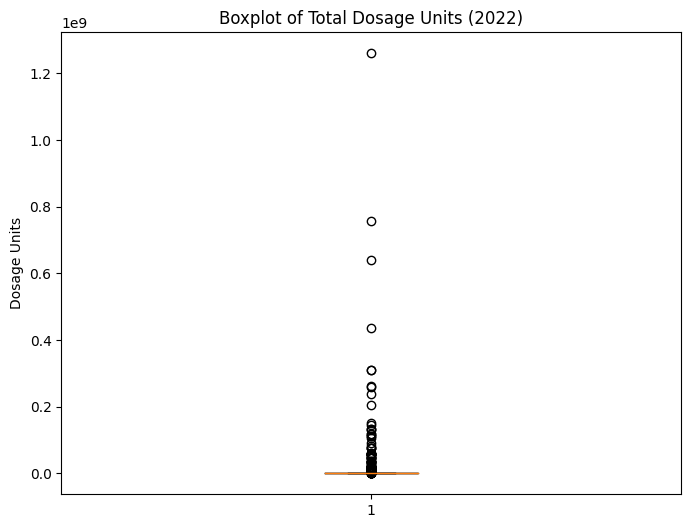

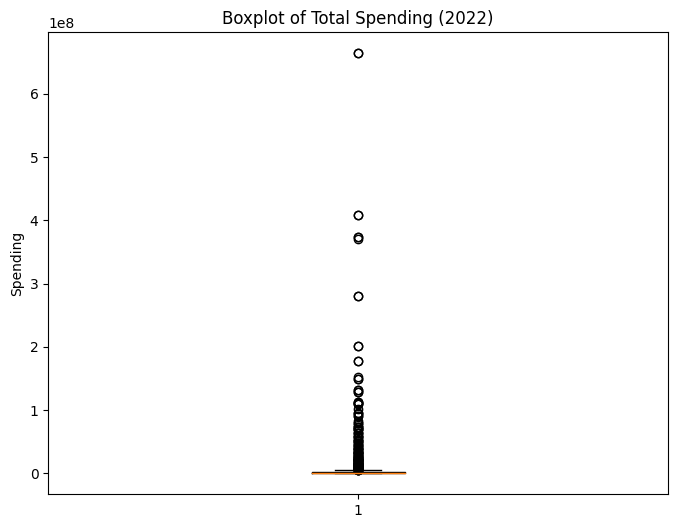

In [24]:
# boxplot for 'Tot_Dsg_Unts_2022' and 'Tot_Spndng_2022'

import matplotlib.pyplot as plt

# boxplot for 'Tot_Dsg_Unts_2022'
plt.figure(figsize=(8, 6))
plt.boxplot(df['Tot_Dsg_Unts_2022'].dropna())
plt.title('Boxplot of Total Dosage Units (2022)')
plt.ylabel('Dosage Units')
plt.show()

# boxplot for 'Tot_Spndng_2022'
plt.figure(figsize=(8, 6))
plt.boxplot(df['Tot_Spndng_2022'].dropna())
plt.title('Boxplot of Total Spending (2022)')
plt.ylabel('Spending')
plt.show()


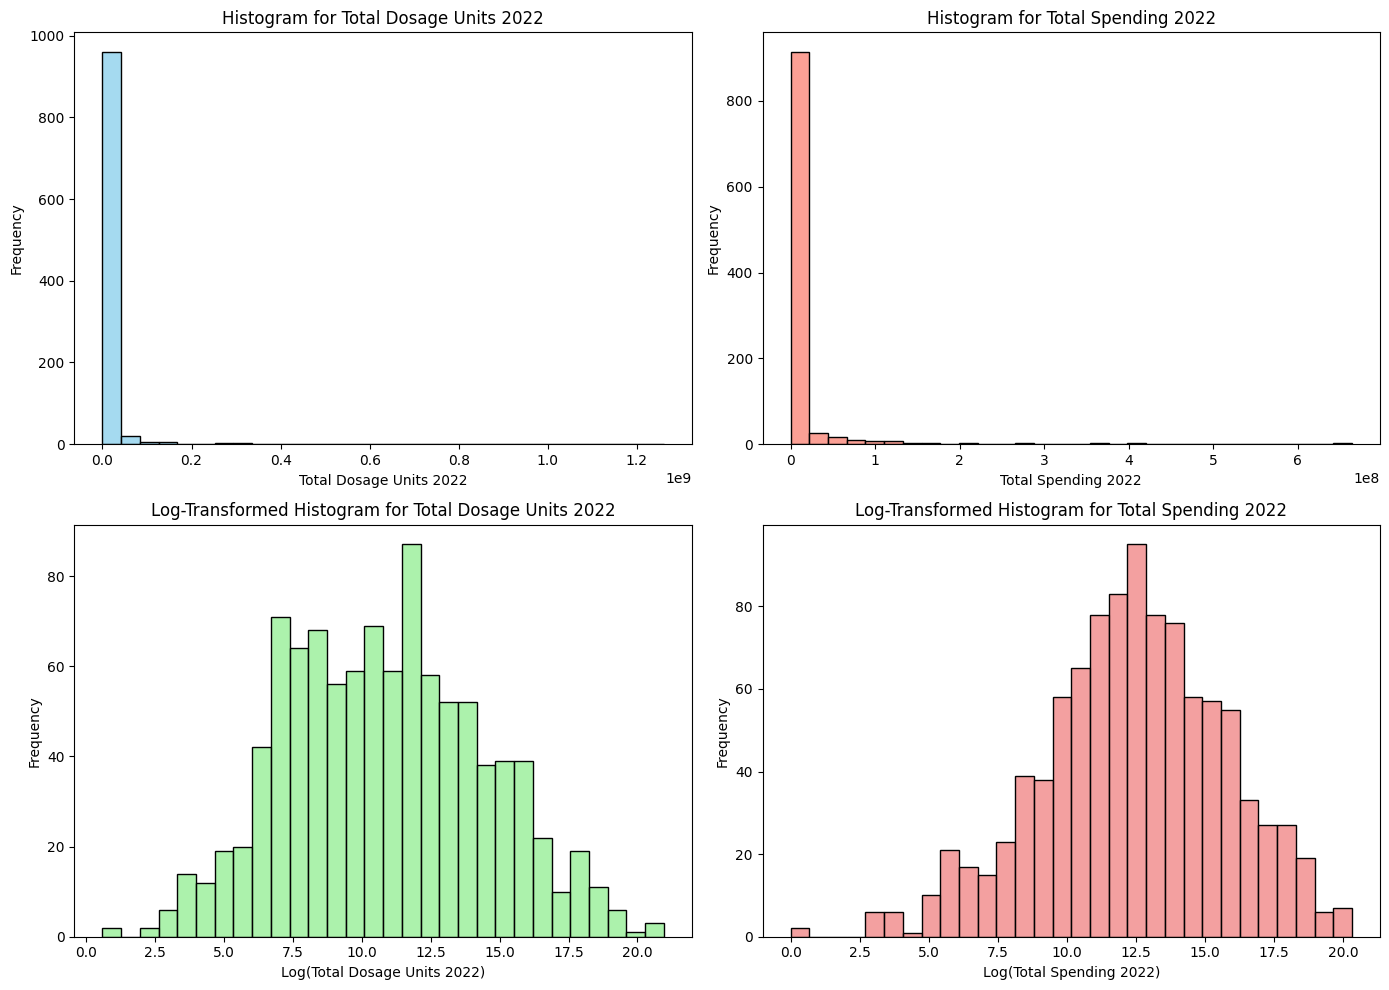

In [31]:

# assuming the log transformation has already been applied as follows:
df['Log_Tot_Dsg_Unts_2022'] = np.log1p(df['Tot_Dsg_Unts_2022'])  # log(1 + x) to handle zero values
df['Log_Tot_Spndng_2022'] = np.log1p(df['Tot_Spndng_2022'])

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# histogram for original 'Tot_Dsg_Unts_2022'
sns.histplot(df['Tot_Dsg_Unts_2022'], bins=30, kde=False, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Histogram for Total Dosage Units 2022')
axs[0, 0].set_xlabel('Total Dosage Units 2022')
axs[0, 0].set_ylabel('Frequency')

# histogram for original 'Tot_Spndng_2022'
sns.histplot(df['Tot_Spndng_2022'], bins=30, kde=False, ax=axs[0, 1], color='salmon')
axs[0, 1].set_title('Histogram for Total Spending 2022')
axs[0, 1].set_xlabel('Total Spending 2022')
axs[0, 1].set_ylabel('Frequency')

# histogram for log-transformed 'Tot_Dsg_Unts_2022'
sns.histplot(df['Log_Tot_Dsg_Unts_2022'], bins=30, kde=False, ax=axs[1, 0], color='lightgreen')
axs[1, 0].set_title('Log-Transformed Histogram for Total Dosage Units 2022')
axs[1, 0].set_xlabel('Log(Total Dosage Units 2022)')
axs[1, 0].set_ylabel('Frequency')

# histogram for log-transformed 'Tot_Spndng_2022'
sns.histplot(df['Log_Tot_Spndng_2022'], bins=30, kde=False, ax=axs[1, 1], color='lightcoral')
axs[1, 1].set_title('Log-Transformed Histogram for Total Spending 2022')
axs[1, 1].set_xlabel('Log(Total Spending 2022)')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


explain what you see. Do the results require any transformations to rescale them?
there is disporportionally a high frequency of total dosage units and total spending that is 0. I rescaled it to be log transformation because of the zero values, this helps reduce the impact of extreme values. The log transfored histogram total dosage units for has the highest frequency around 11 and the log total spending is around 12. for the log total dosage unit has a high frequency around 6, while log total spending is drastically lower.

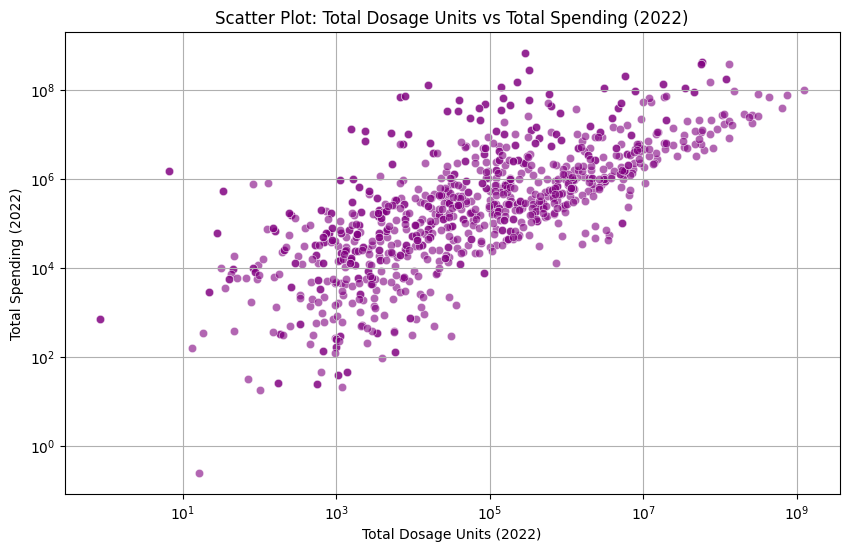

In [32]:
# scatter plot for total spending and total dosage units
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Tot_Dsg_Unts_2022'], y=df['Tot_Spndng_2022'], color='purple', alpha=0.6)

plt.title('Scatter Plot: Total Dosage Units vs Total Spending (2022)')
plt.xlabel('Total Dosage Units (2022)')
plt.ylabel('Total Spending (2022)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)

plt.show()

There is a positive trend with the increase of the total dosage units to the total spending. there are the highest density in the middle of the plot.

In [33]:
summary_stats = df[['Tot_Dsg_Unts_2022', 'Tot_Spndng_2022']].describe()
print(summary_stats)

       Tot_Dsg_Unts_2022  Tot_Spndng_2022
count       1.000000e+03     1.000000e+03
mean        8.456602e+06     1.083729e+07
std         5.807951e+07     4.724870e+07
min         8.250000e-01     0.000000e+00
25%         3.121875e+03     3.103414e+04
50%         4.473550e+04     2.572329e+05
75%         6.718869e+05     2.290045e+06
max         1.260331e+09     6.643178e+08


The data both dosage units and spending is skewed with a few large values. This is shown by the difference between the mean and median and the high standard deviation. outlier detection methods would help see wether these variables effect the analysis.